In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


In [2]:
# Cargo el dataset limpio:

df_spotify = pd.read_csv("../data/df_spotify_clean.csv")
df_spotify.head()

,track_id,artist,album_name,track_name,popularity,duration_mins,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,release_year
0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,2.62,False,0.714,0.472,2,...,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance,NaN
1,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,3.32,False,0.621,0.782,2,...,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop,NaN
2,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,2.71,False,0.835,0.679,7,...,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin,NaN
3,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,2.92,True,0.561,0.965,7,...,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance,NaN
4,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,2.98,True,0.911,0.712,1,...,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin,NaN


In [3]:
# Aunque la columna 'release_year' tiene muchos nulos, decido dejarla para mantener el resto de datos de esas filas que si resultan interesantes para el análisis.

df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89741 non-null  object 
 1   artist            89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89741 non-null  int64  
 5   duration_mins     89741 non-null  float64
 6   explicit          89741 non-null  bool   
 7   danceability      89741 non-null  float64
 8   energy            89741 non-null  float64
 9   key               89741 non-null  int64  
 10  loudness          89741 non-null  float64
 11  mode              89741 non-null  int64  
 12  speechiness       89741 non-null  float64
 13  acousticness      89741 non-null  float64
 14  instrumentalness  89741 non-null  float64
 15  liveness          89741 non-null  float64
 16  valence           89741 non-null  float6

In [4]:
# Elijo un estilo y una paleta de color para las visualizaciones en seaborn:

sns.set_style(style = "dark")
sns.set_palette("pastel")

## Para empezar hago un análisis global del dataset

### Descripción de cada columna:

+ track_id: Identificador único para cada canción.
+ artist: Artista.
+ album_name: Nombre del album al que pertenece la canción.
+ track_name: Nombre de la canción.
+ popularity: Indíca el nivel de popularidad de la canción.
+ duration_mins: Duración de la canción en minutos. 
+ explicit: Indíca si la canción es explícita o no. (0 = No explícita, 1 = explícita).
+ danceability: Bailabilidad, de 0 a 1, a mayor valor, más bailable es la canción.
+ energy: Energía, de 0 a 1, a mayor valor, más enérgica es la canción.
+ key: Clave musical o escala en la que está escrita la canción, enpezando en 0 como DO, incrementa un semitono por cada valor --> 0 = C, 1 = C#, 2 = D, 3 = D#, 4 = E, 5 = F, 6 = F#, 7 = G, 8 = G#, 9 = A, 10 = A#.
+ loudness: Medido en (db), a mayor dbs, más volumen tiene la canción. Recordar que el estandar para servicios de streaming es de -14 dbs LUFS
+ mode: Tonalidad de la canción: 0 = Tonalidad menor, 1 = Tonalidad Mayor.
+ speechiness: De 0 a 1, a mayor valor, más letra tiene la canción.
+ acousticness: De 0 a 1, a mayor valor, más acústica es la canción.
+ instrumentalness: De 0 a 1, a mayor valor, más instrumentización hay en la canción.
+ liveness: De 0 a 1, a mayor valor, más posible que la canción sea una grabación en directo.
+ valence: De 0 a 1, a mayor valor, la canción genera un estado de ánimo más positivo.
+ tempo: BPMs o pulsaciones por minuto de la canción.
+ time_signature: Compás de la canción (número de negras por cada compás) 4/4, 3/4, 2/4, etc...
+ track_genre: El género musical de la canción.
+ release_year: El año de lanzamiento.


In [5]:
# Creo un DF secundario con el top 10 de generos musicales en cuanto a cantidad de tracks dentro del dataset.

top_genres = df_spotify.track_genre.value_counts().nlargest(10)
top_genres

track_genre
acoustic         1000
afrobeat          999
tango             999
ambient           999
alt-rock          999
cantopop          999
study             998
forro             998
chicago-house     998
bluegrass         998
Name: count, dtype: int64

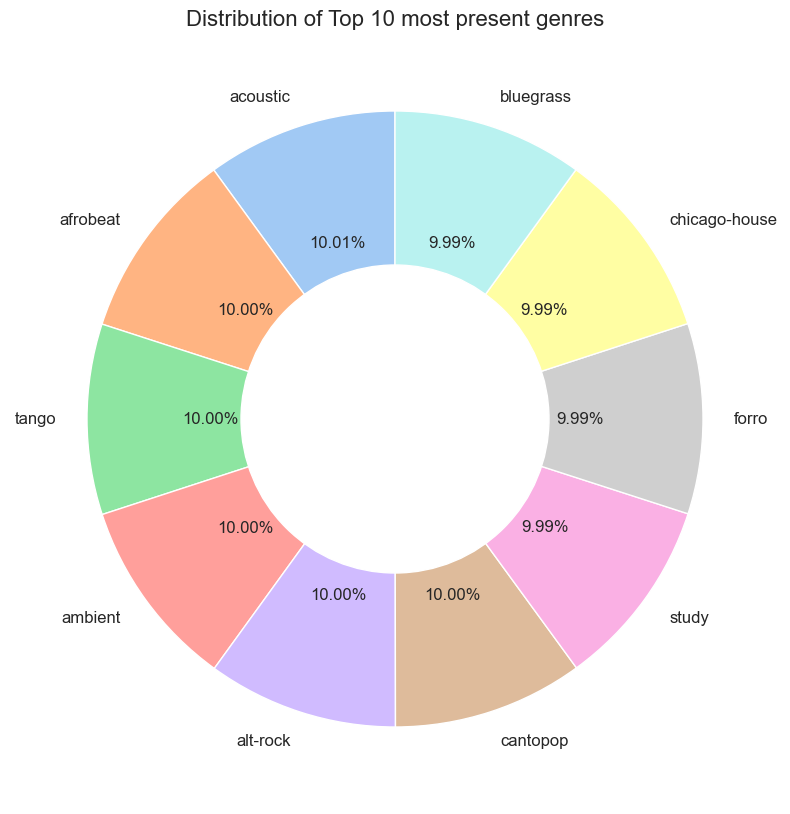

In [6]:
# Primero veo la distribucion del top 10 de géneros en el total del dataset:

fig, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.pie(top_genres.values, labels = top_genres.index, autopct = "%.2f%%", startangle = 90, textprops={'fontsize': 12});
ax.set_title("Distribution of Top 10 most present genres", fontsize = 16)
circle = plt.Circle((0,0), 0.5, color = "white")
ax.add_artist(circle);

No hay una diferencia significativa entre los 10 géneros con más canciones.

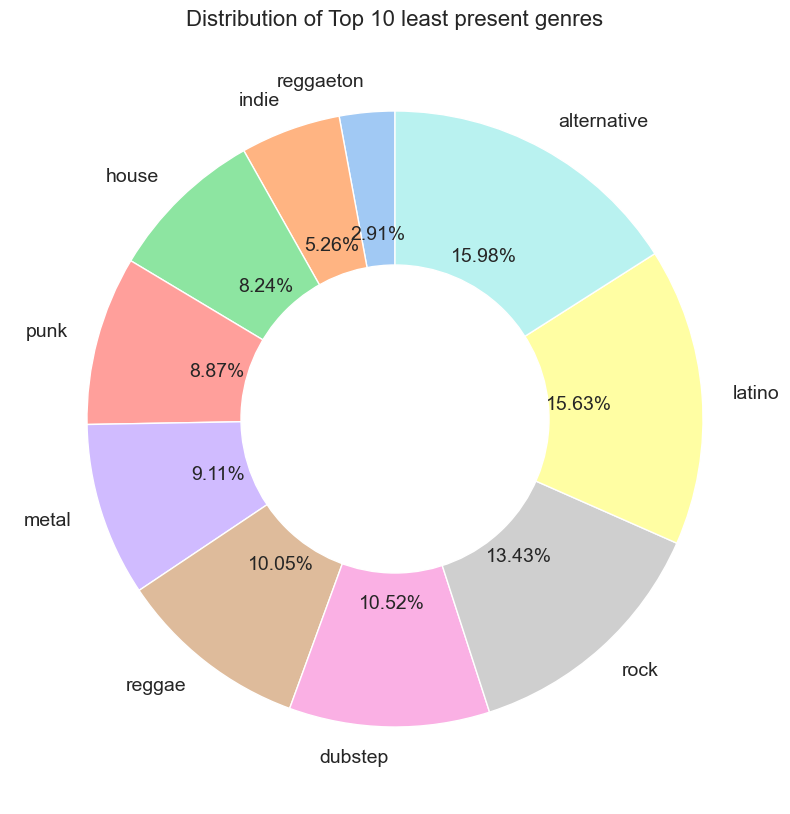

In [7]:
# Ahora los géneros menos presentes:

top_genres_low = df_spotify.track_genre.value_counts().nsmallest(10)

fig, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.pie(top_genres_low.values, labels = top_genres_low.index, autopct = "%.2f%%", startangle = 90, textprops={'fontsize': 14});
ax.set_title("Distribution of Top 10 least present genres", fontsize = 16)
circle = plt.Circle((0,0), 0.5, color = "white")
ax.add_artist(circle);

Aquí hay que destacar el reggeaton, siendo uno de los géneros más escuchados a nivel global, ¿como es posible que aquí sea el que menos representación tiene?  

Este se debe a que en casi todo el mundo se llama erroneamente reggeaton a la música latina comercial (Bad Bunny, Daddy Yankee y demás) y en este dataset, esta música está englobada en "latin".  
Realmente el reggeaton es un género underground nacido a partir del reggae que apenas tiene presencia a nivel global.

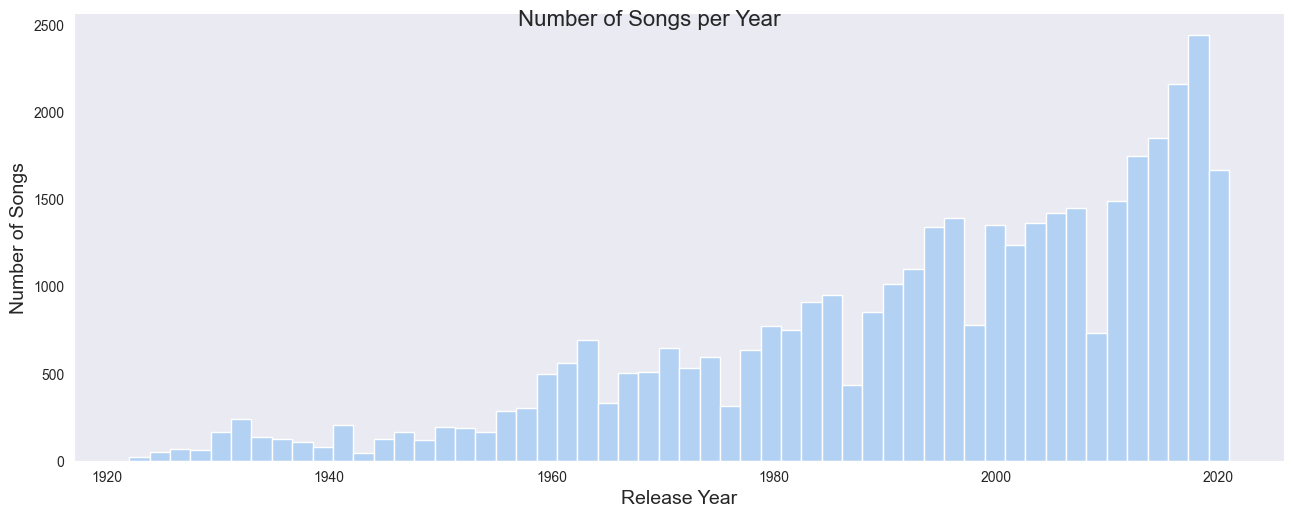

In [8]:
# Número de canciones por año:

years = df_spotify["release_year"]

songs_year = sns.displot(years, discrete = False, aspect = 2.5, height = 5.2, kind = "hist").set_axis_labels("Release Year", "Number of Songs", fontsize = 14)
songs_year.fig.suptitle("Number of Songs per Year", fontsize=16);

Se puede ver como a partir de los '80s la cantidad de música producida incrementa exponencialmente, esto se debe al abaratamiento y la mayor facilidad de acceso a grabaciones e instrumentos musicales.

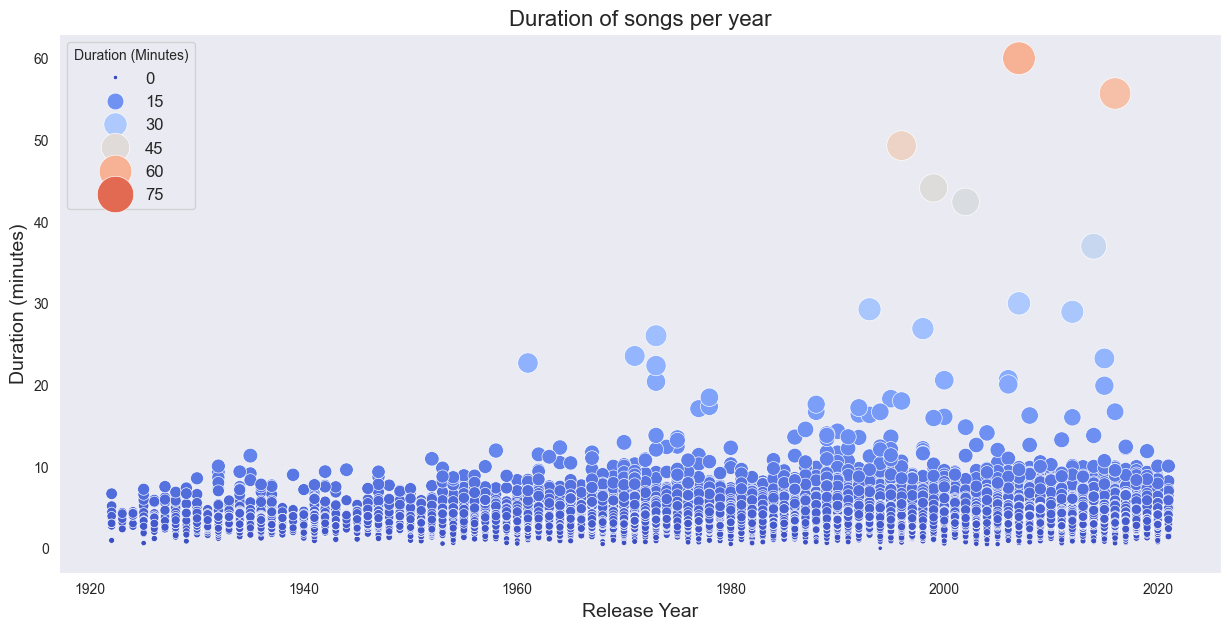

In [9]:
# Duración de los tracks por año:

fig, ax = plt.subplots(1, 1, figsize = (15, 7))
sns.scatterplot(x = "release_year", y = "duration_mins", data = df_spotify, hue = "duration_mins", palette= "coolwarm", size= "duration_mins", sizes= (10, 800)).legend(loc = "upper left", fontsize = "large", title = "Duration (Minutes)")
plt.xlabel("Release Year", fontsize = 14)
plt.ylabel("Duration (minutes)", fontsize = 14)
plt.title("Duration of songs per year", fontsize = 16);

Se puede observar como desde los años '20 hasta la actualidad, la gran mayoría de la música tiene una duración de unos 5 minutos de media.  

Es a partir de los '60 cuando empiezan a haber anomalías.  

Vamos a ver a que corresponden estas anomalías:

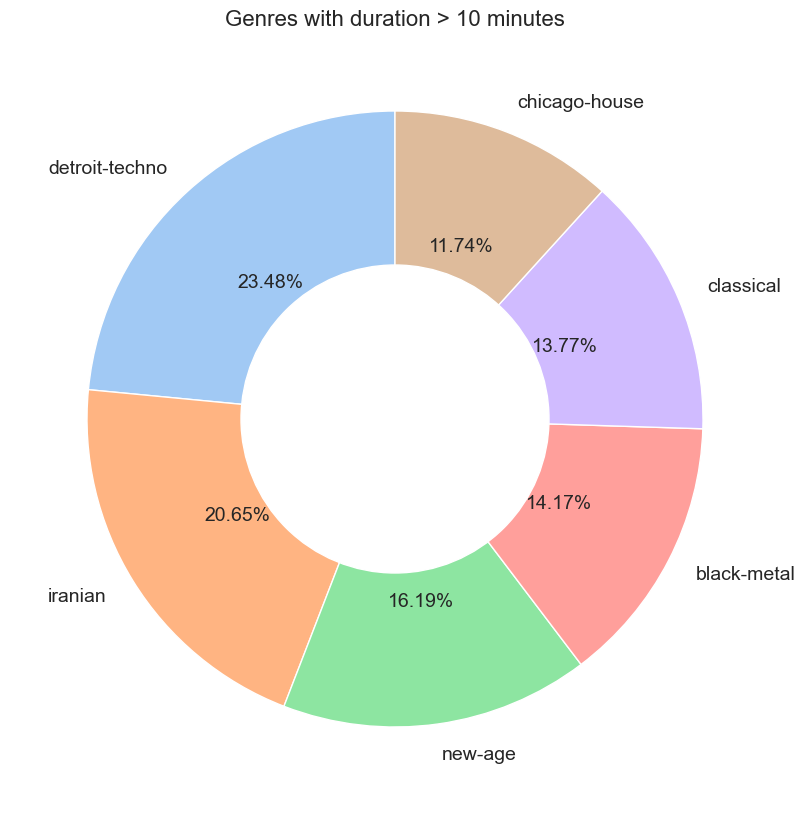

In [10]:
#Géneros con duración de más de 10 minutos:

long_duration = df_spotify[df_spotify["duration_mins"] > 10]

data = long_duration["track_genre"].value_counts().head(6)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.pie(data.values, labels = data.index, autopct = "%.2f%%", startangle = 90, textprops={'fontsize': 14});
ax.set_title("Genres with duration > 10 minutes", fontsize = 16);

circle = plt.Circle((0,0), 0.5, color = "white")
ax.add_artist(circle);


Esa década de los '60 corresponde como podemos ver con la aparición de diferentes géneros de música electrónica, como el techno o el house, cuyos tracks suelen durar alrededor de 10 minutos.  

También aparecen nuevos géneros musicales como el new-age o el black metal que experimentan y desafían las convenciones musicales anteriores.  

Por supuesto una de las anomalías es la música clásica que por definición son piezas de larga duración.  

La sorpresa en este caso es la música Iraní.

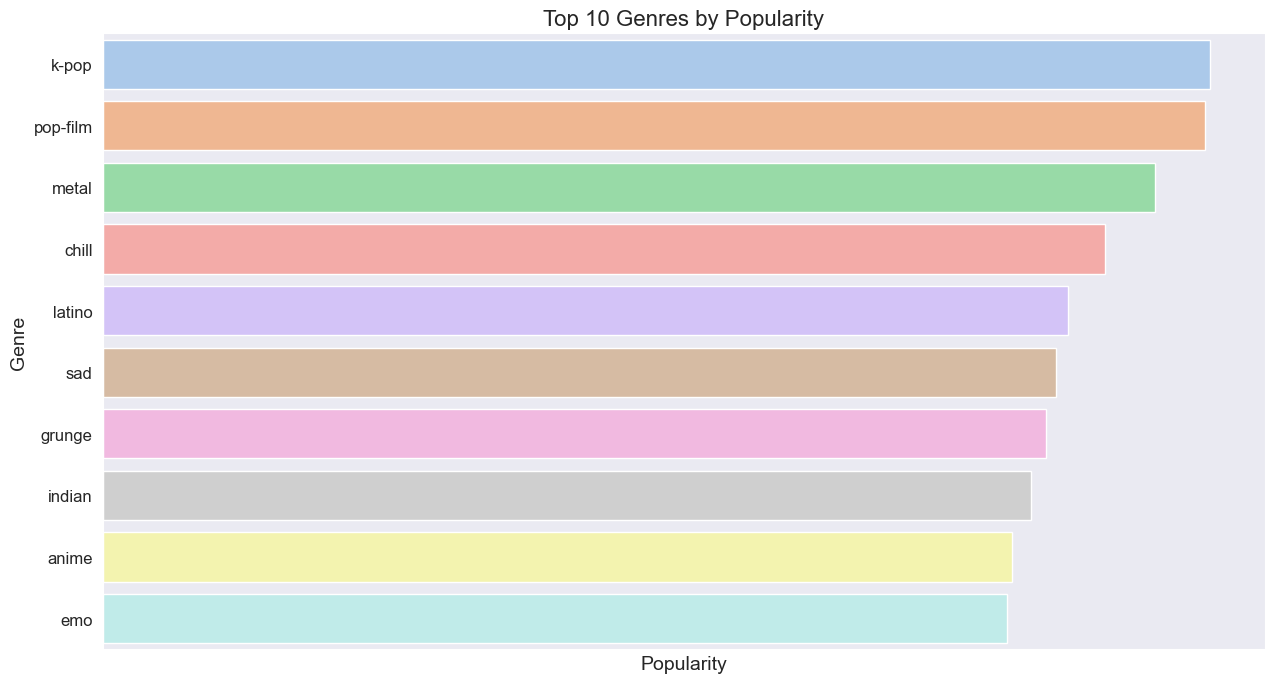

In [11]:
# Géneros más populares

top_gen_pop = df_spotify.groupby("track_genre")["popularity"].mean().sort_values(ascending = False).reset_index().head(10)

plt.figure(figsize = (15,8))
sns.barplot(y = "track_genre", x = "popularity", data = top_gen_pop, hue = "track_genre").tick_params(labelsize = 12)

plt.title("Top 10 Genres by Popularity", fontsize= 16)
plt.xticks([])
plt.xlabel("Popularity", fontsize = 14)
plt.ylabel("Genre", fontsize = 14);

Aquí encontramos más sorpresas:  

El género más popular en spotify es el K-Pop, seguido por Pop-film que hace referencia a canciones de películas populares. Seguido en 3er lugar por el metal,  aún siendo un estilo musical que no está visto como comercial.  

Otra sorpresa es la música india como el 7º género más popular de spotify.

## Análisis específico de las características de los tracks

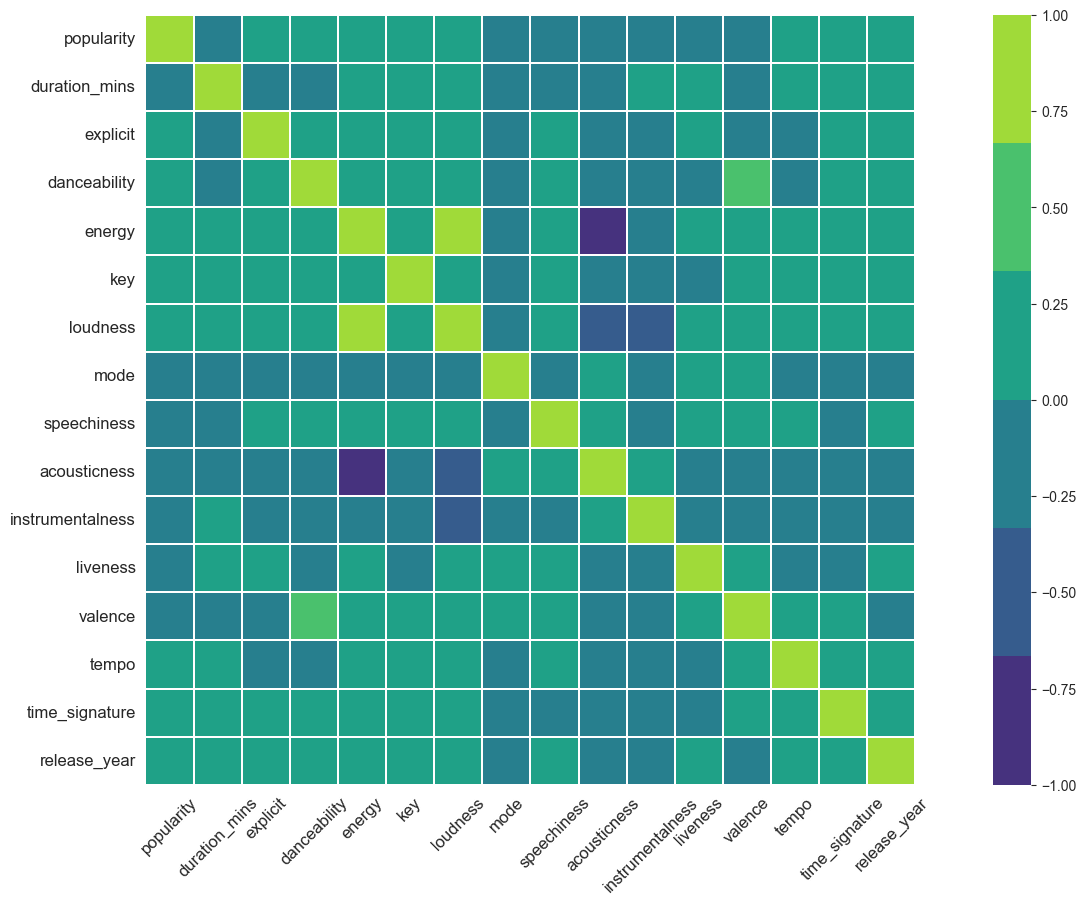

In [12]:
#Correlación:

matriz_corr = df_spotify.corr(numeric_only= True)

plt.figure(figsize = (20,10))
sns.heatmap(matriz_corr,
            vmin = -1,
            vmax = 1,
            cmap = sns.color_palette("viridis"),
            square=True,
            linewidths = .2,
            annot = False).tick_params(labelsize = 12)
plt.xticks(rotation = 45);

Las variables más correlacionadas positivamente son: energy - loudness y danceability - valence.  

La relacionada más negativamente es acousticness - energy

C:\Users\lucas\AppData\Local\Temp\ipykernel_25992\786234008.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x = "mode", y = "popularity", data = df_spotify, hue = "mode", legend= False).set_xticklabels(new_tags, fontsize = 12)


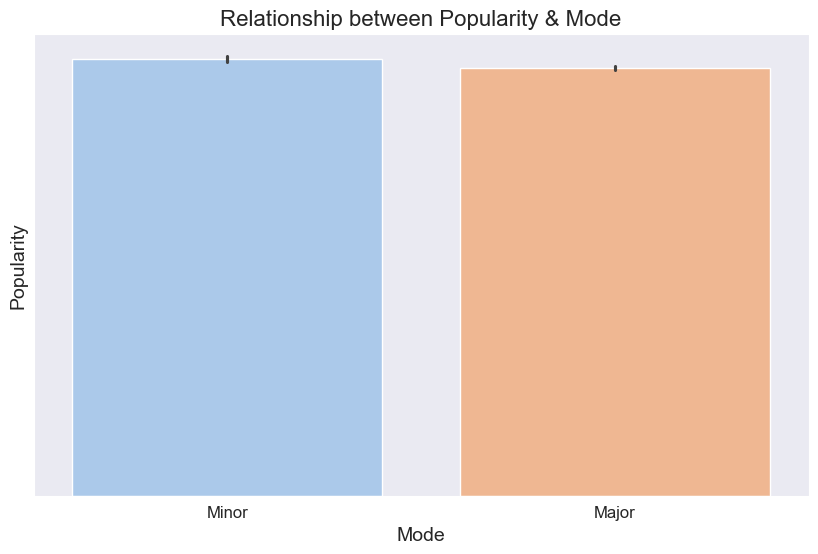

In [13]:
# Quiero ver que la correlacion entre tonalidad y popularidad

new_tags = ["Minor", "Major"]

plt.figure(figsize = (10, 6))

sns.barplot(x = "mode", y = "popularity", data = df_spotify, hue = "mode", legend= False).set_xticklabels(new_tags, fontsize = 12)

plt.title("Relationship between Popularity & Mode", fontsize = 16)
plt.xlabel("Mode", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.yticks([]);



No hay una gran diferencia entre la popularidad entre tonalidades mayores y menores. Se podría pensar que las tonalidades mayores al sonar más "alegres" serían más populares, pero como hemos podido ver en el top 10 de géneros más populares, "sad" se encontraba en el top 10.

C:\Users\lucas\AppData\Local\Temp\ipykernel_25992\1062121776.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x ="mode", y = "danceability", data = df_spotify, hue = "mode", legend= False).set_xticklabels(new_tags, fontsize = 12);


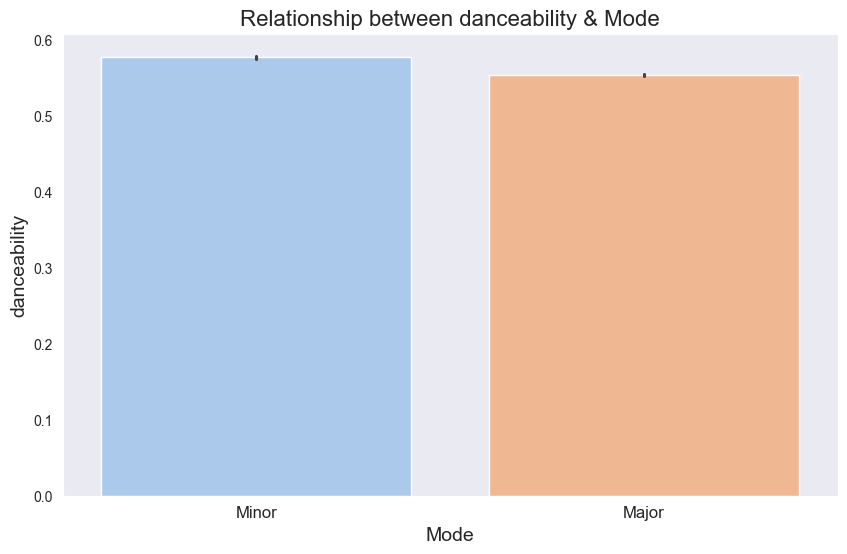

In [14]:
# Quiero ver que la correlacion entre tonalidad y bailabilidad

plt.figure(figsize = (10, 6))

sns.barplot(x ="mode", y = "danceability", data = df_spotify, hue = "mode", legend= False).set_xticklabels(new_tags, fontsize = 12);

plt.title("Relationship between danceability & Mode", fontsize = 16)
plt.xlabel("Mode", fontsize = 14)
plt.ylabel("danceability", fontsize = 14);

Aquí también se podría pensar que las canciones en tonalidad mayor (más alegres) serían más bailables, pero se puede ver como no hay una gran diferencia.

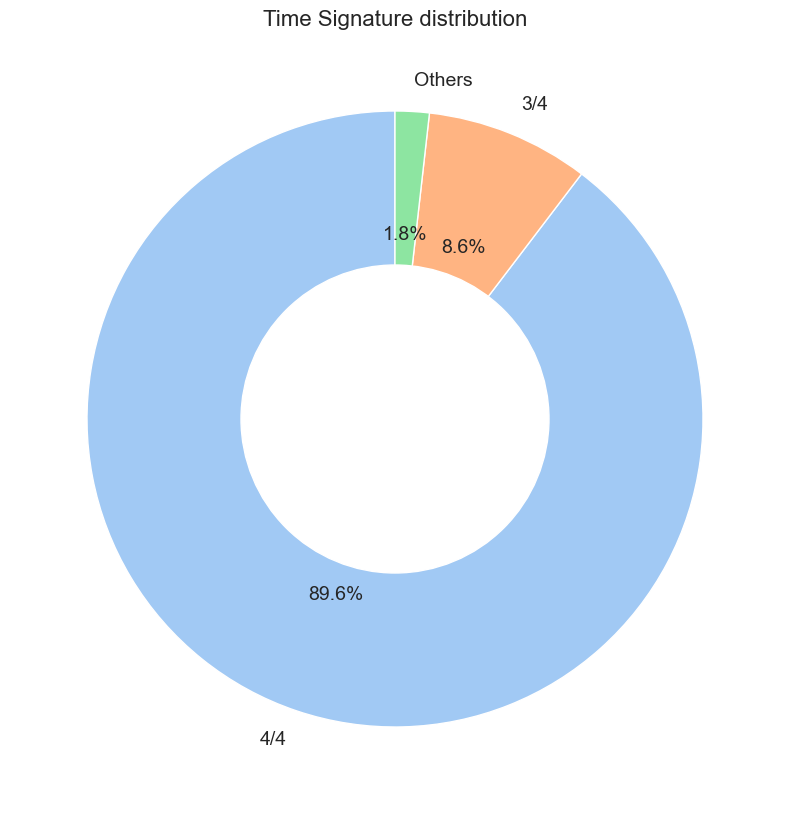

In [15]:
# Tempo:

new_tags_time = ["4/4", "3/4", "Others"]
data = df_spotify["time_signature"].value_counts().nlargest(3)

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.pie(data.values, labels = new_tags_time, startangle = 90, autopct= "%1.1f%%", textprops={'fontsize': 14})
plt.title("Time Signature distribution", ha= "center", fontsize= 16)
circle = plt.Circle((0,0), 0.5, color = "white")
ax.add_artist(circle);

Como era de esperar, la gran mayoría de las canciones están compuestas en un compás de 4/4.  

Hay un pequeño segmento pero significativo de canciones en 3/4 y una muy pequeña parte de canciones que están en otros tempos

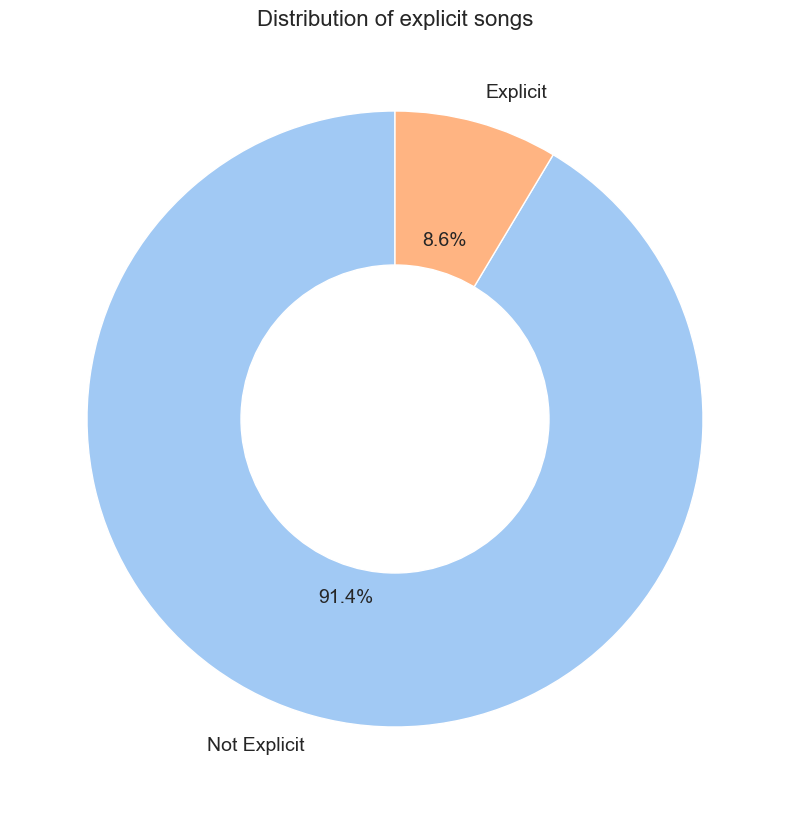

In [16]:
# Cuantas están marcadas como explicitas:

new_tags_exp = ["Not Explicit", "Explicit"]
data = df_spotify["explicit"].value_counts()

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.pie(data.values, labels = new_tags_exp, autopct = "%.1f%%", startangle = 90,  textprops={'fontsize': 14});
plt.title("Distribution of explicit songs", ha= "center", fontsize= 16)
circle = plt.Circle((0,0), 0.5, color = "white")
ax.add_artist(circle);

La gran mayoría de canciones no son explicitas, esto puede deberse a que muchos artistas con canciones explicitas sacan una segunda versión de la canción censurada o con la letra cambiada para poder ser emitida en radio o televisión.

C:\Users\lucas\AppData\Local\Temp\ipykernel_25992\2743139797.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x = "explicit", y = "popularity", data = df_spotify, hue = "explicit", legend = False).set_xticklabels(new_tags_exp, fontsize= 12);


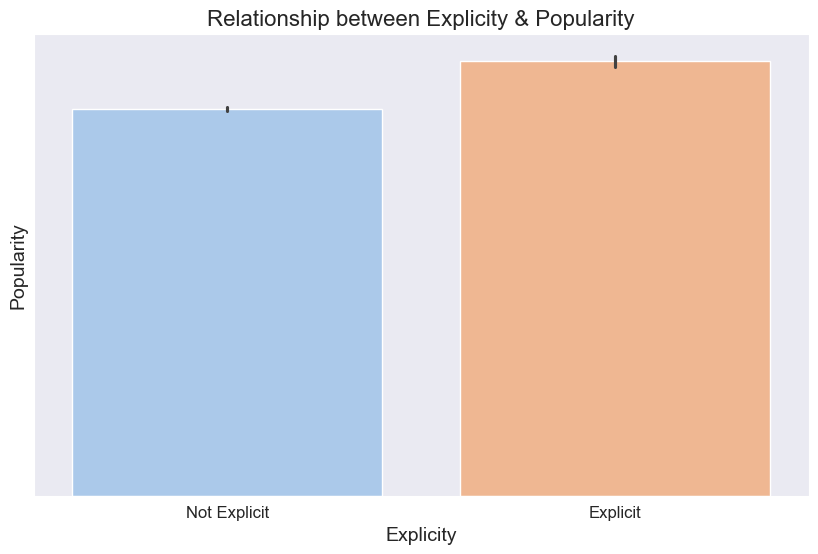

In [17]:
# cuanto de populares son las canciones explicitas:


plt.figure(figsize=(10, 6))

sns.barplot(x = "explicit", y = "popularity", data = df_spotify, hue = "explicit", legend = False).set_xticklabels(new_tags_exp, fontsize= 12);

plt.title("Relationship between Explicity & Popularity", fontsize = 16)
plt.xlabel("Explicity", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.yticks([]);

Aun así, podemos ver como las marcadas como explicitas tienen algo más de popularidad que las no explicitas.

In [18]:
# Popularidad vs danceability 

df_dance_mean = df_spotify.groupby("popularity")["danceability"].mean().sort_values(ascending = False).reset_index()

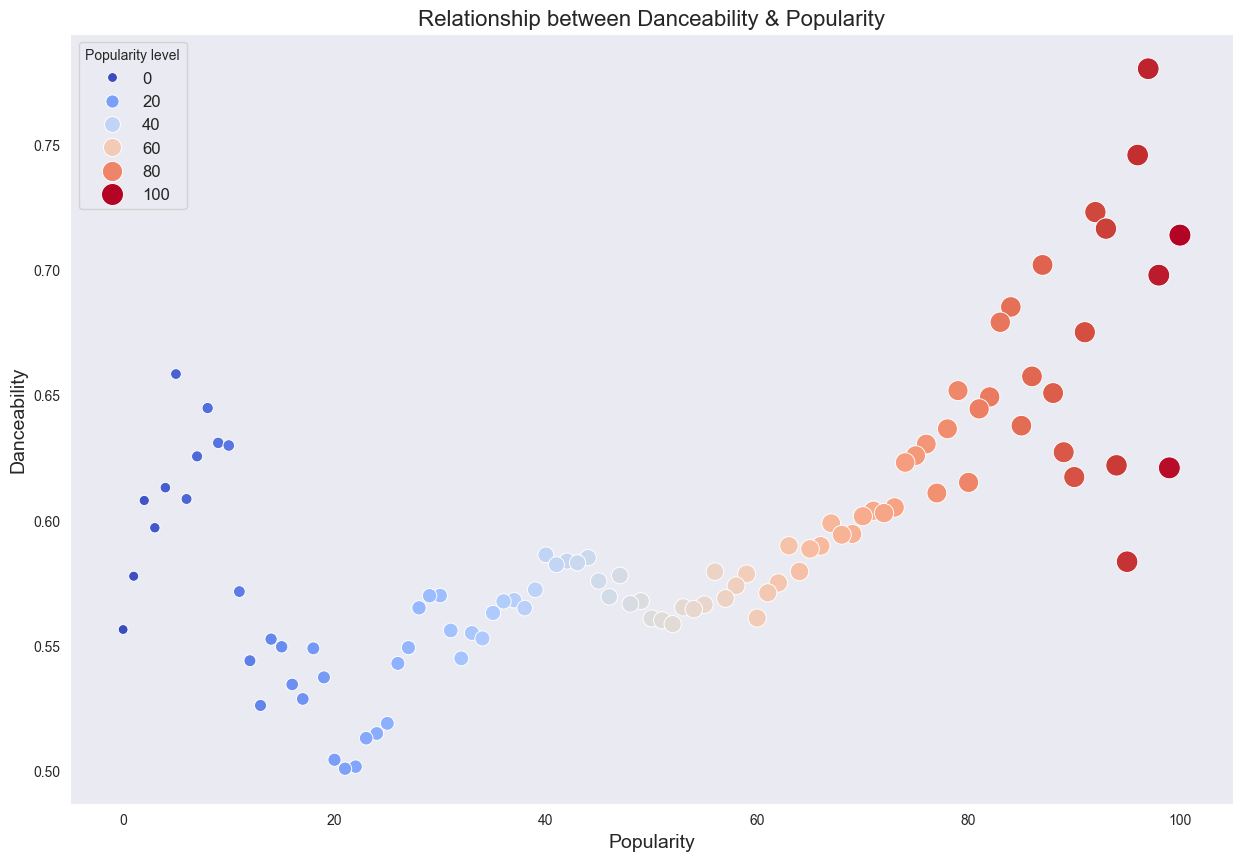

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
sns.scatterplot(x = "popularity", y = "danceability", data = df_dance_mean, hue = "popularity", size = "popularity", sizes= (50, 250), palette= "coolwarm").legend(loc = "upper left", fontsize = "large", title = "Popularity level")
plt.xlabel("Popularity", fontsize = 14)
plt.ylabel("Danceability", fontsize = 14)
plt.title("Relationship between Danceability & Popularity", fontsize = 16);

Las canciones más populares tienen un nivel más alto de bailabilidad

In [20]:
# Popularity vs duration:

df_duration_mean = df_spotify.groupby("popularity")["duration_mins"].mean().sort_values(ascending = False).reset_index()


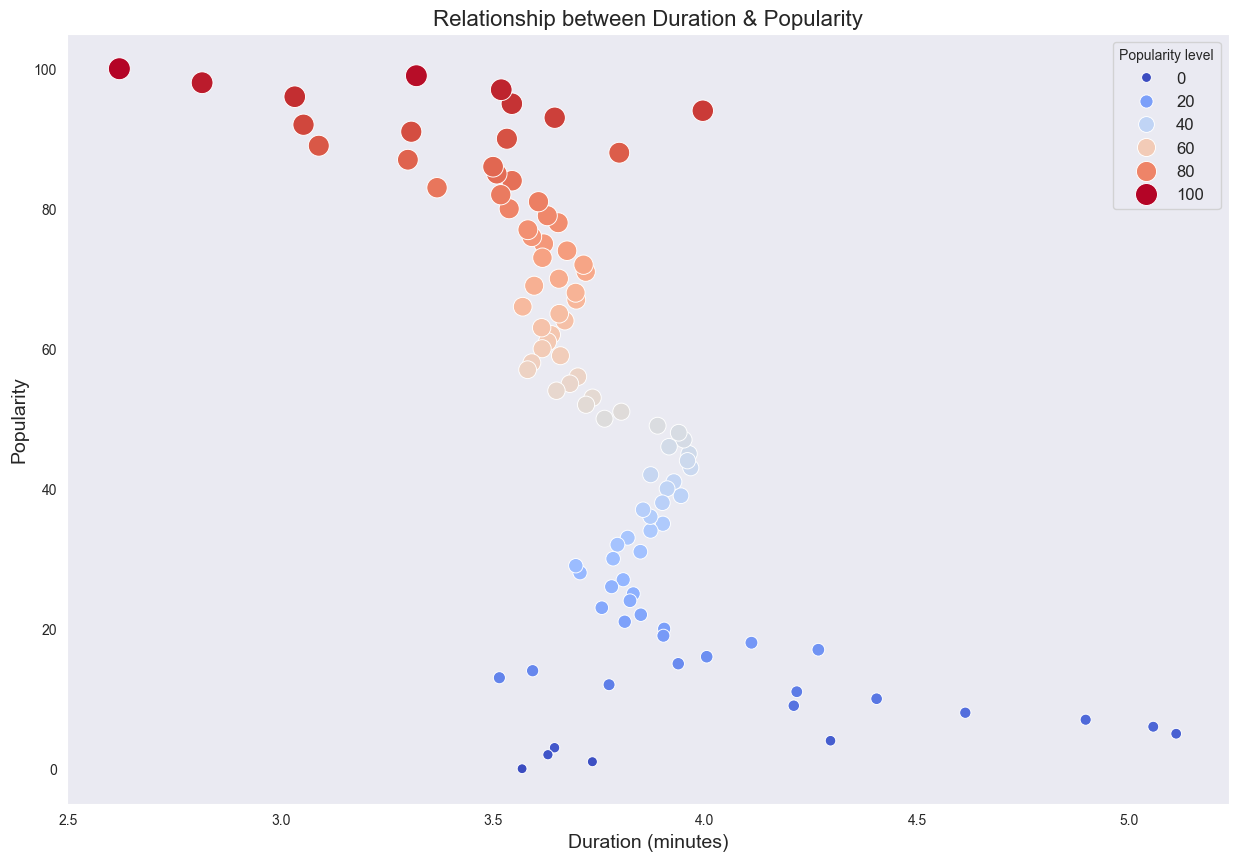

In [21]:
fig, ax = plt.subplots(1,1, figsize = (15,10))
sns.scatterplot(x = "duration_mins", y = "popularity", data = df_duration_mean, hue = "popularity", size = "popularity", sizes = (50, 250), palette= "coolwarm").legend(loc = "upper right", fontsize = "large", title = "Popularity level")
plt.xlabel("Duration (minutes)", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.title("Relationship between Duration & Popularity", fontsize = 16);

Las canciones más populares duran entre 2.5 y 4 minutos. A partir de 4 minutos no hay ninguna entre las más populares.

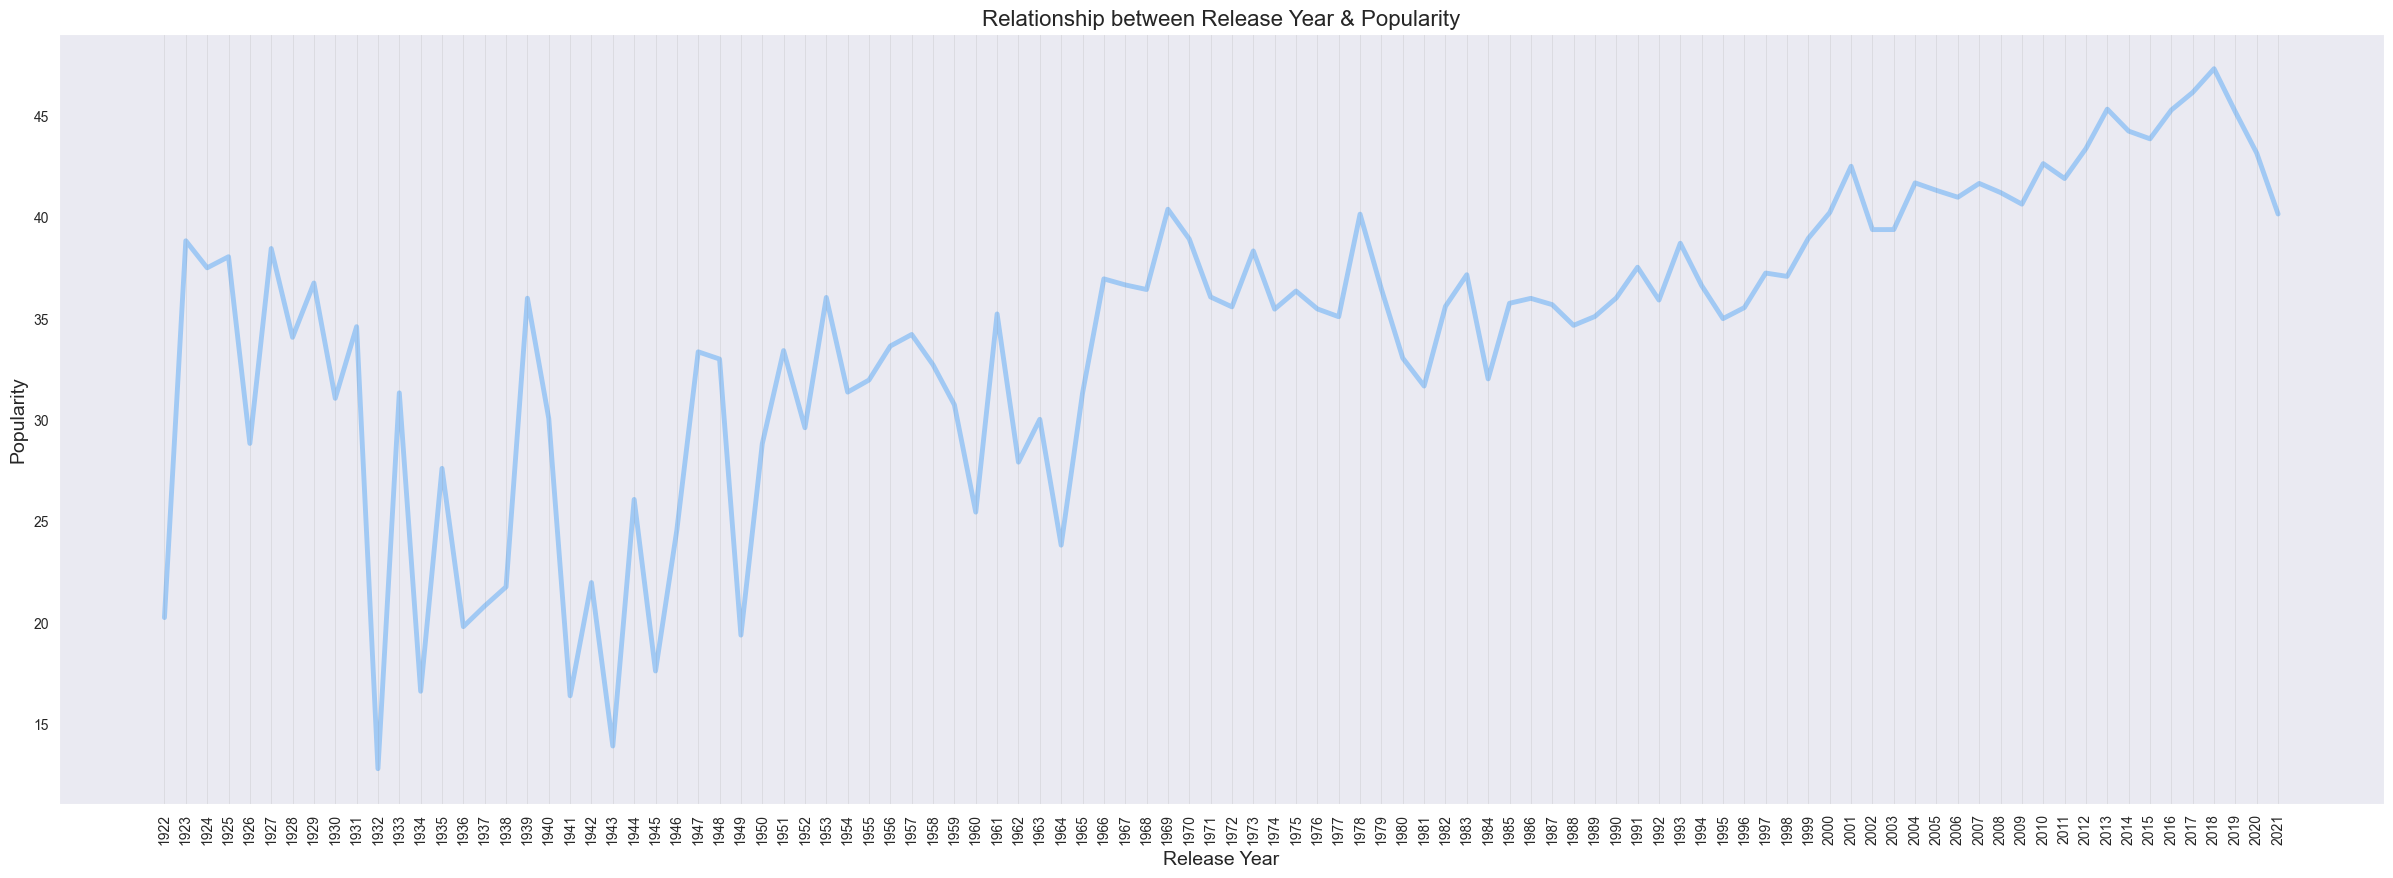

In [22]:
# Media de popularidad de las canciones por año:

fig, ax = plt.subplots(1,1, figsize = (30,10))

df_spotify_year_pop = df_spotify.groupby("release_year")["popularity"].mean().reset_index()

plt.title("Average popularity of songs base on year")
sns.lineplot(data=df_spotify_year_pop, x = "release_year", y = "popularity", linewidth = 3.5)
plt.xticks(df_spotify_year_pop["release_year"],rotation = 90)

for y in df_spotify_year_pop["release_year"].unique():
    plt.axvline(y, color = "gray", linestyle ="-", linewidth = 0.5, alpha = 0.2)
plt.xlabel("Release Year", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.title("Relationship between Release Year & Popularity", fontsize = 16);

Desde el '64 se ha producido un incremento gradual en popularidad. Cabe destacar que a partir de 2019 la popularidad de los nuevos lanzamientos empieza a descender.

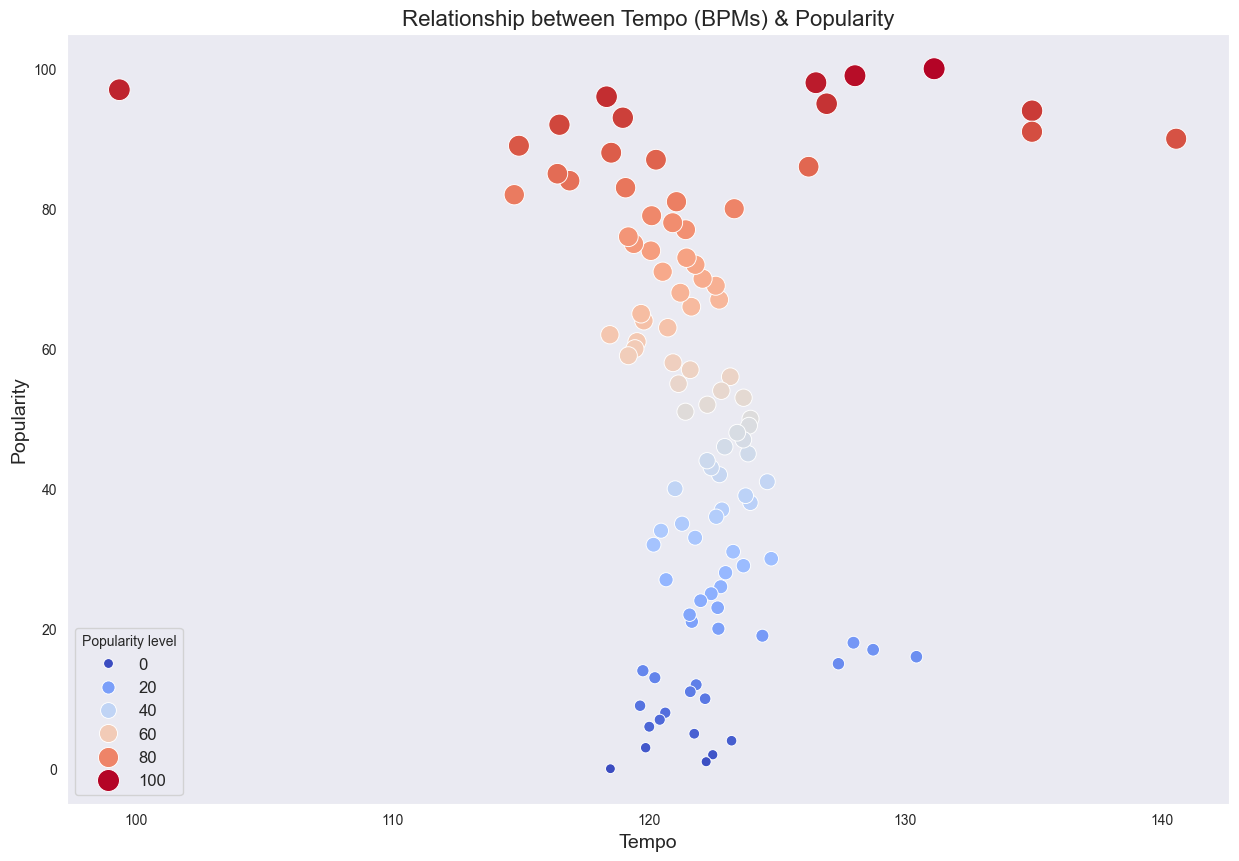

In [23]:
# Tempo (BPM)
df_tempo_mean = df_spotify.groupby("popularity")["tempo"].mean().sort_values(ascending = False).reset_index()
fig, ax = plt.subplots(1, 1, figsize = (15,10))
sns.scatterplot(x = "tempo", y = "popularity", data = df_tempo_mean, hue = "popularity", size = "popularity", sizes= (50, 250), palette= "coolwarm").legend(loc = "lower left", fontsize = "large", title = "Popularity level")
plt.xlabel("Tempo", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.title("Relationship between Tempo (BPMs) & Popularity", fontsize = 16);

El tempo favorito de los usuarios está entre 90-100 BPMs (Más usado en música latina, reggeaton, etc), entre 120 y 130, que se encuntra la música electrónica comercial, y a partir de 135 que es el utilizado en Rock, Metal, Hardcore...

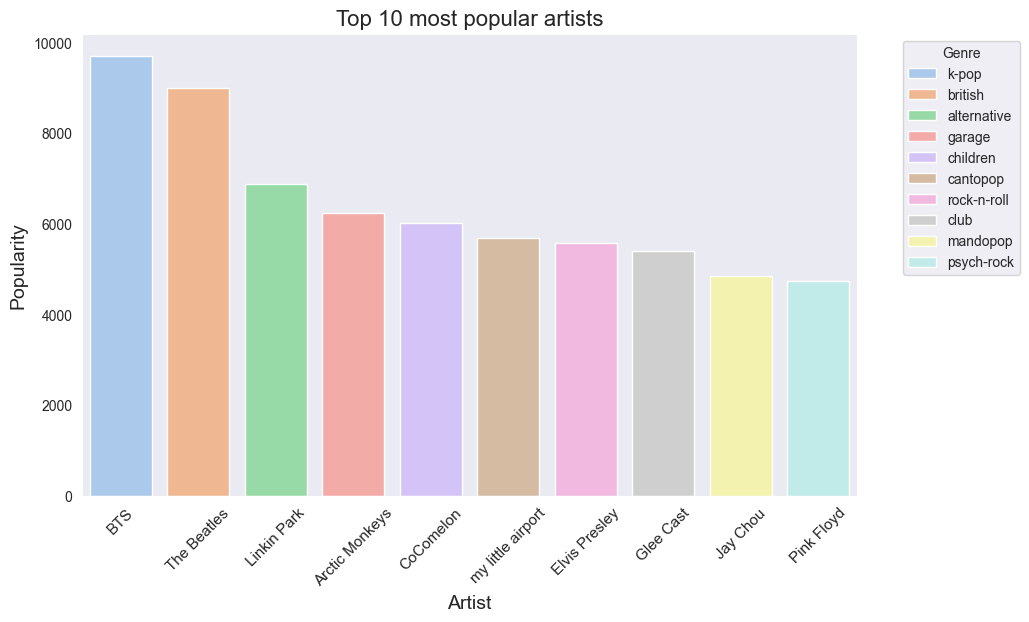

In [24]:
# Artistas más populares:

artist_data = df_spotify.groupby("artist").agg({"popularity": "sum", "track_genre": "first"})
top_10_artists = artist_data.nlargest(10, "popularity")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_artists.index, y=top_10_artists["popularity"], hue=top_10_artists["track_genre"])
plt.xlabel("Artist", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.title("Top 10 most popular artists", fontsize = 16)
plt.xticks(rotation=45, fontsize = 11)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En relacion con los géneros más populares, en primer lugar se encuentra BTS, un grupo de k-Pop, seguido por grupos alternative, garage y rock.  

Como sorpresa encontramos a CoComelon (infantil) como uno de los artistas más populares.

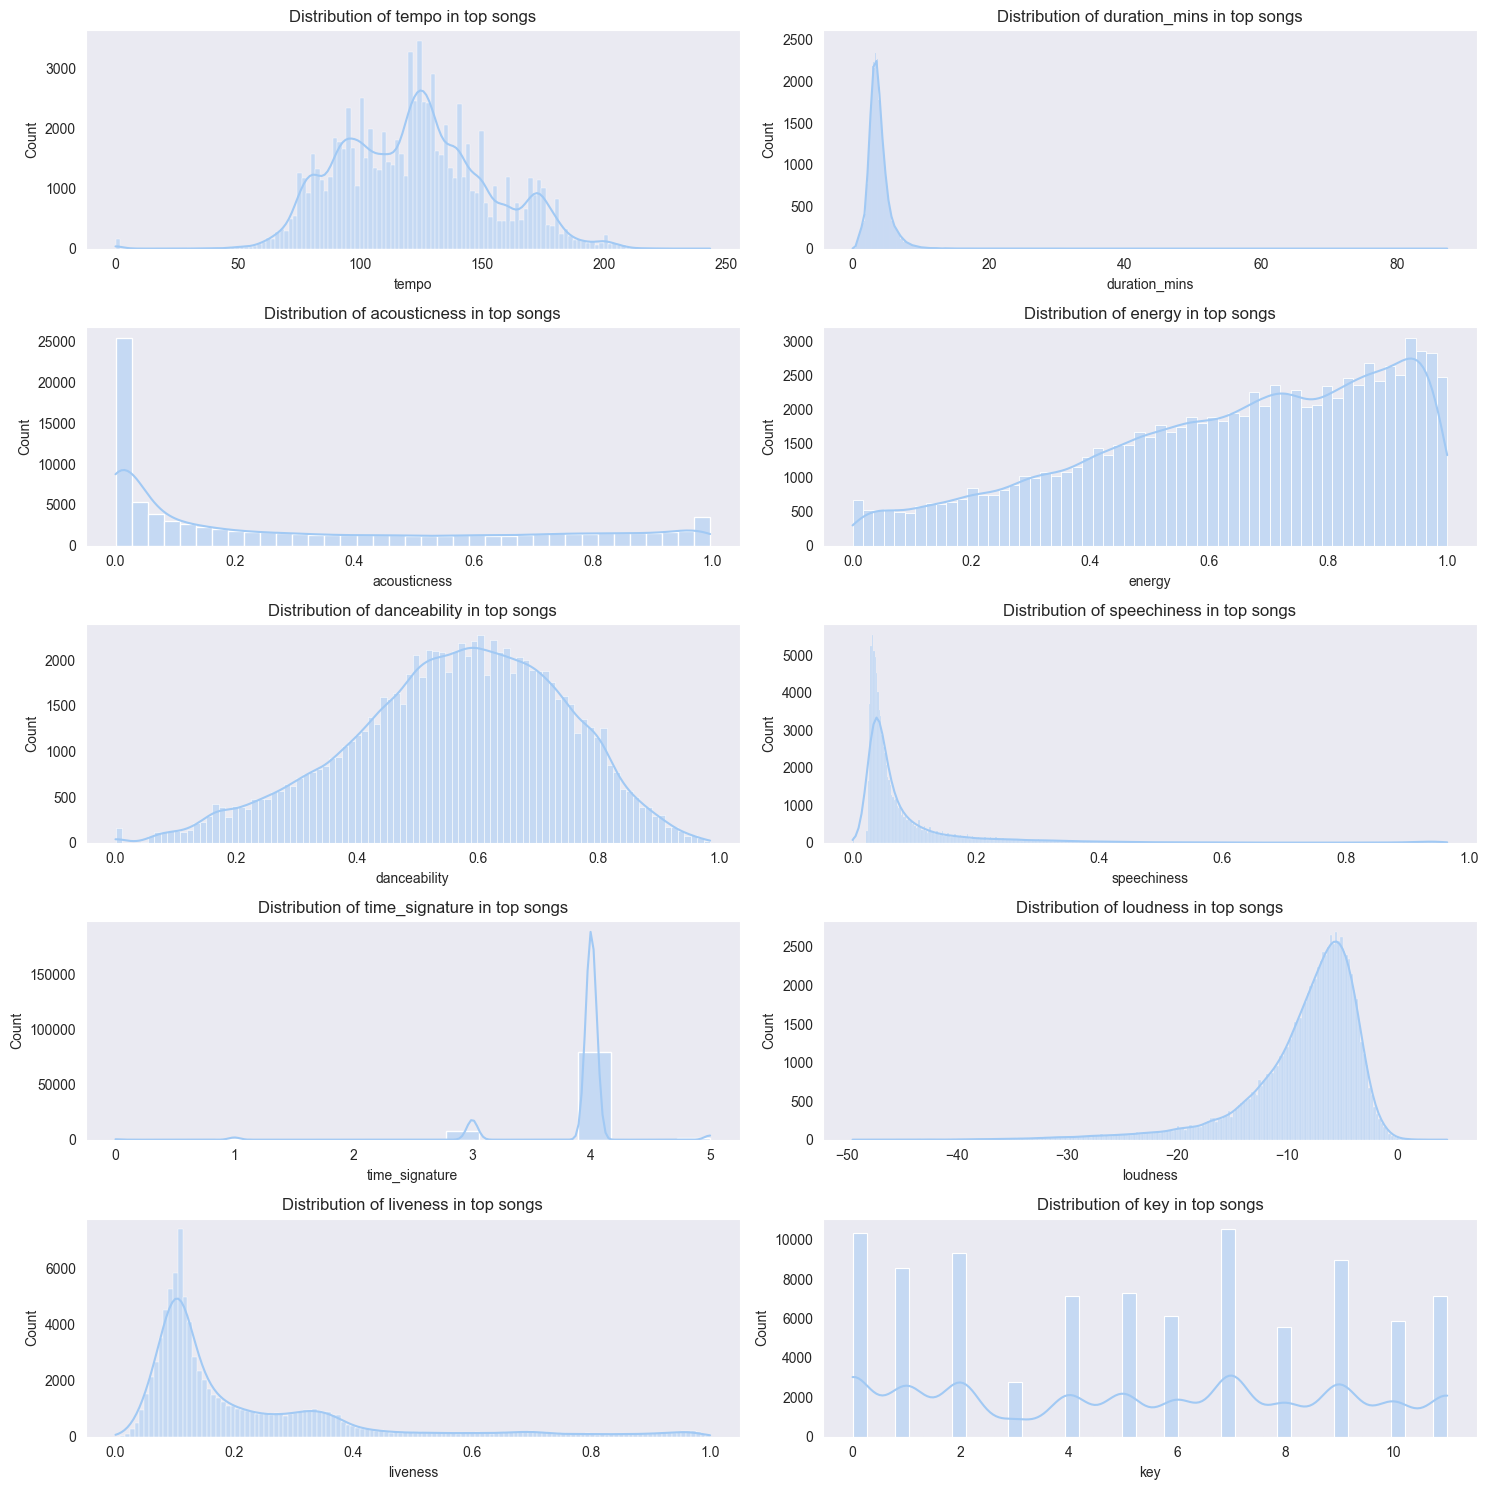

In [25]:
# Otros parámetros interesantes:

tmp_cols =  ["tempo", "energy", "danceability", "loudness", "liveness", 
             "duration_mins", "acousticness", "speechiness", "time_signature", "key"]
fig, axes = plt.subplots(5, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
for count, col in enumerate(tmp_cols):
    sns.histplot(df_spotify[col], kde = True, ax = axes[count%5][count % 2])
    axes[count%5][count % 2].title.set_text(f"Distribution of {col} in top songs")
    
plt.tight_layout()
plt.show()

+ Tempo: Como se ha comentado antes, la gran mayoria de canciones se encuentran entre los 125 y 130 BPMs que corresponden a la musica comercial, entre los 80 y los 100 encontramos también una gran cantidad que corresponde al reggeaton y demás estilos latinos, a partir de los 140 la cantidad de canciones empieza a disminuir, esto se corresponde a diferentes generos de metal, hardcore, hardtechno y demás cores.  

+ Duration: La gran mayoría de canciones está entre los 2 y 3 minutos, siendo a partir de los 5 casos excepcionales. hay canciones que llegan hasta 90 minutos de duración, esto corresponde a bandas sonoras de peliculas y música clásica.  

+ Acousticness: La grán mayoría de canciones son poco acusticas.  

+ Energy: Hay un crecimiento constante en la cantidad de energía de los tracks.  

+ Danceability: La mayoría de canciones tienen un valor medio de bailabilidad.  

+ Speachiness: Casi todas las canciones tienen un porcentaje bajo de palabra hablada respecto a la duración completa de la canción.

+ Time Signature: Como hemos visto antes la mayoría de canciones están en 4/4, seguido de 3/4 y con valores también en 1/4 y 5/4.

+ Loudness: Este gráfico resulta bastante interesante, el estandar de volumen en la masterización para servicios de streaming se encuentra entre los -17dbs y -14dbs (en el caso concreto de spotify es -14dbs). Sin embargo se puede ver como la gran mayoria de canciones están por encima de ese estandar, alrededor de los -6dbs, esto se debe a un fenomemo conocido como "loudness war", en los ultimos años los artistas han empezado a masterizar sus canciones cada vez con más volumen, para sonar más fuerte, más potente. Esto tiene poco sentido ya que las plataformas de streaming aplican compresión y limitación a las canciones por encima de -14dbs, lo que lleva a una perdida de dinámica en el sonido y de calidad de la canción.  

+ Liveness: La mayoría de las canciones tienen un grado bajo de directo.  

+ Key: Resulta interesante ver como parece haber una preferencia por ciertas escalas, destacan DO, MI y SOL, mientras que la escala menos utilizada es RE#.

C:\Users\lucas\AppData\Local\Temp\ipykernel_25992\1441255605.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x = "key", y = "popularity", data = df_key_mean, hue = "key", palette= "pastel", legend = False).set_xticklabels(new_tags_key, fontsize= 12);


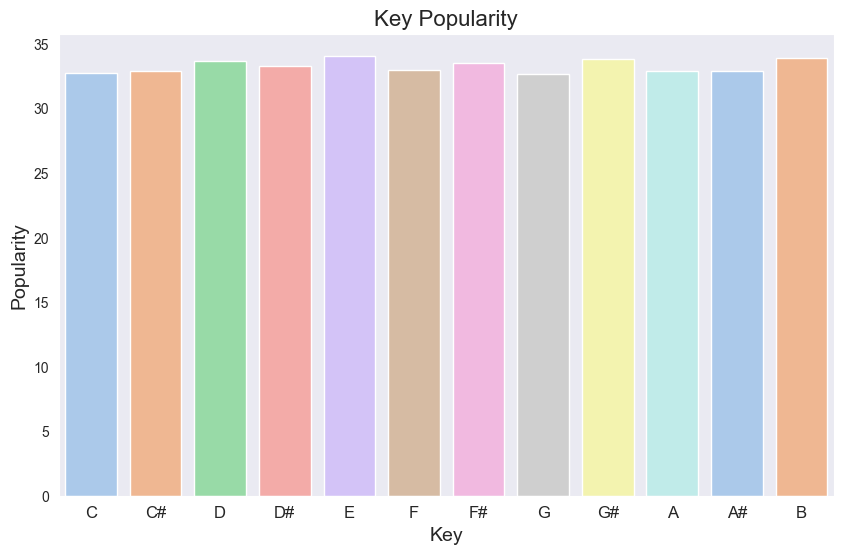

In [26]:
#Tonalidades más populares:
new_tags_key = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

df_key_mean = df_spotify.groupby("key")["popularity"].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize=(10, 6))
plt.title("Key Popularity", fontsize = 16)
plt.xlabel("Key", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
sns.barplot(x = "key", y = "popularity", data = df_key_mean, hue = "key", palette= "pastel", legend = False).set_xticklabels(new_tags_key, fontsize= 12);

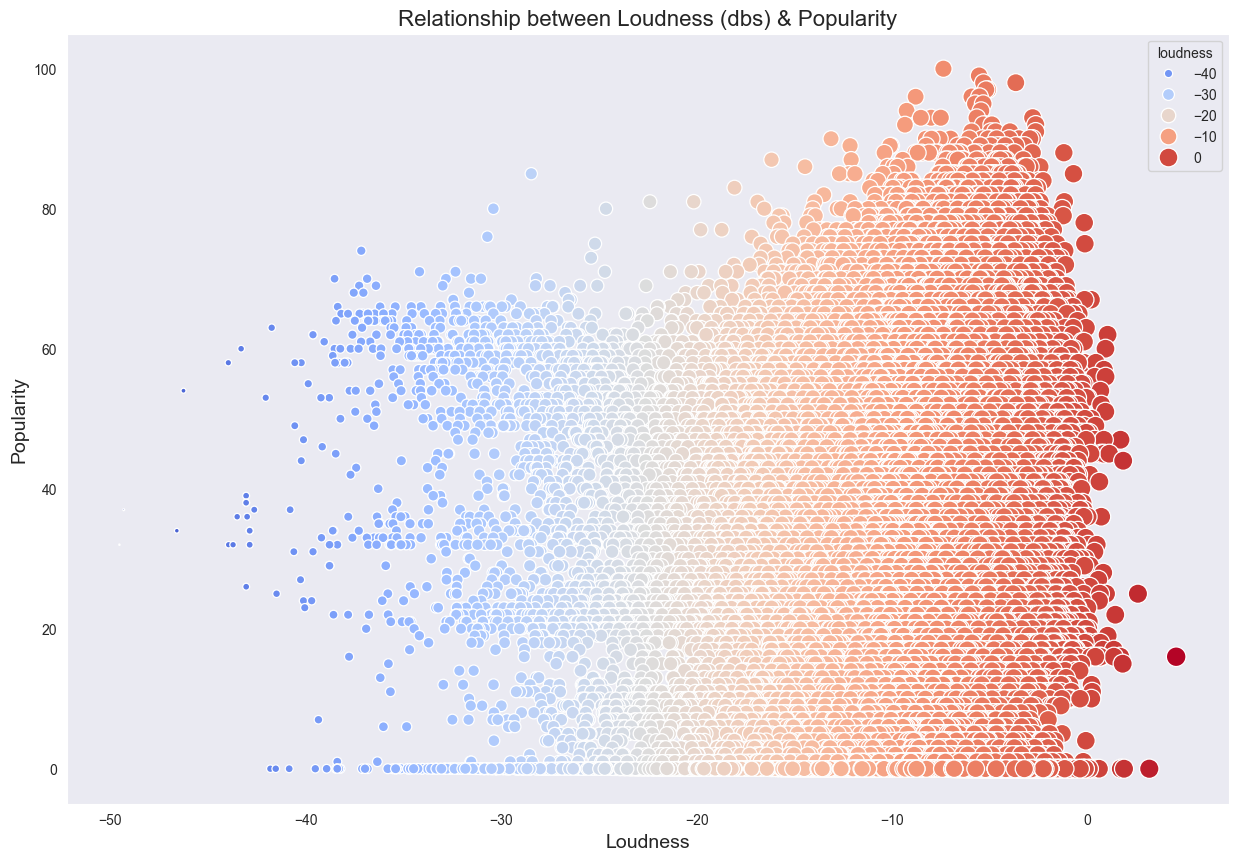

In [27]:
# Volumen y popularidad

fig, ax = plt.subplots(1, 1, figsize = (15,10))
sns.scatterplot(x = "loudness", y = "popularity", data = df_spotify, hue = "loudness", size = "loudness", sizes= (1, 200), palette= "coolwarm")
plt.xlabel("Loudness", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.title("Relationship between Loudness (dbs) & Popularity", fontsize = 16);

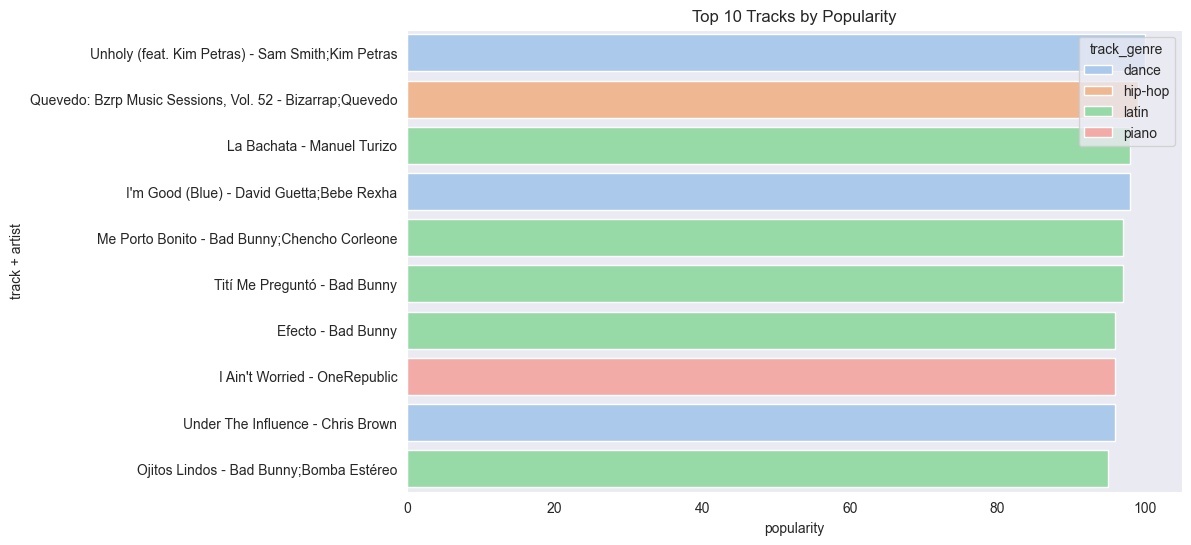

In [28]:
# Canciones más populares

top_track_pop = df_spotify.nlargest(columns= "popularity", n= 10)
top_track_pop["track + artist"] = top_track_pop["track_name"] + " - " + top_track_pop["artist"]

plt.figure(figsize = (10,6))
sns.barplot(y = "track + artist", x = "popularity", data = top_track_pop, hue = "track_genre").set(title = "Top 10 Tracks by Popularity");

Para terminar vemos cuales han sido las canciones más populares de spotify.

Se puede destacar:  

+ 6 de las 10 canciones más populares son de reggeaton (aunque una de ellas la marque como hip-hop), otras 3, Dance, y solo 1 de un género diferente (piano, que debería ser pop).  

+ 4 de las 10 canciones más populares son de Bad Bunny.

+ Aun siendo el género más popular el k-pop, y el artista más popular BTS, en el top 10 de canciones no aparece ni k-pop, ni BTS.